# Big Data Mart Sales Problem

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the train dataset
df=pd.read_csv('bigdatamart_train.csv')

In [3]:
#checking the shape of data
df.shape

(8523, 12)

Train data have 8523 rows and 12 columns

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
#Checking column names
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
#Checking data type
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Numerical Features:
    
Item_Weight

Item_Visibility

Item_MRP

Item_Outlet_Sales(Target Variable)

Outlet_Establishment_Year

Categorical Features:
    
Item_Identifier

Item_Fat_Content(Ordinal Feature)

Item_Type

Outlet_Itemtifier

Outlet_Size(Ordinal Feature)

Outlet_Location_Type(Ordinal Feature)

Ootlet_Type(Ordinal Feature)

In [7]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Observations:
    
Total count of Item_Weight is 7060 which is less than the length of the training dataset, therefore it may contains some missing values.

The average weight of all items is 12kg and the maximum weight of the item is 21 kg. So it is clear that the stores are not selling heavy weight items.

The maximum price of the items is 266, so we can say that the stores does not selling costly items.

Most recent store was established in 2009 and the oldest store was established in 1985.

Average sales of items is Rs 2181 and the maximum sale is Rs 13,086.

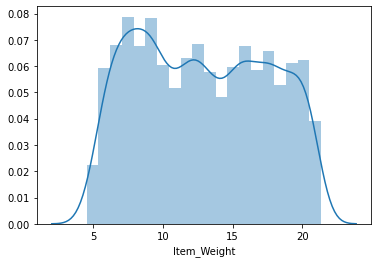

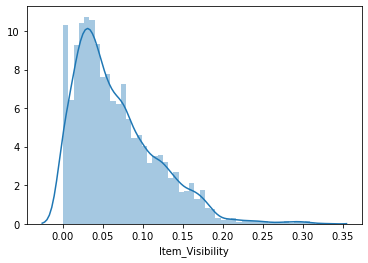

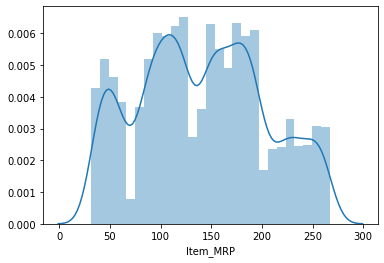

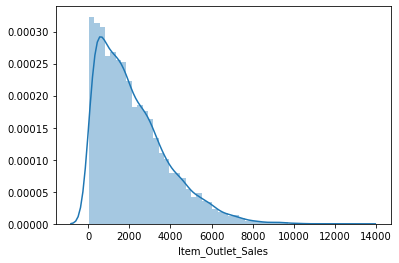

In [8]:
#checking distribution of data
for i in df.columns:
    if (df[i].dtypes == float) or (df[i].dtypes==int):
        sns.distplot(df[i])
        plt.show()

Observations:

The weight of the items lies in the range of 4 - 22 while the average weight of the items is 12.

There are some items that are not visible at all and the maximum visibility of the item is 33%.

The price of the items range in between Rs 31 - 265. The most expensive item in the stores is of Rs 266.89.

Most of the stores has a maximum sales in between 450 - 3900. Only few of the stores having sales more than 6000.

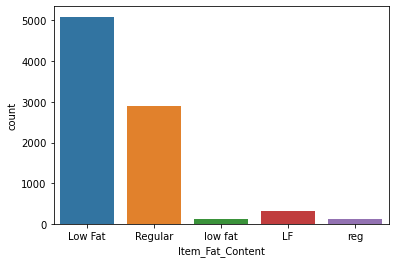

In [9]:
sns.countplot('Item_Fat_Content',data=df)

Around 64% of the total items contains low fat while remaining contains regular fat.

low fat and LF and Low Fat all are same and Regular and reg is also same.
Lets treat this problem

In [10]:
df['Item_Fat_Content']=df['Item_Fat_Content'].apply(lambda x: x.lower())
df['Item_Fat_Content']=df['Item_Fat_Content'].apply(lambda x:'lf' if x=='low fat' else x )
df['Item_Fat_Content']=df['Item_Fat_Content'].apply(lambda x:'reg' if x=='regular' else x )

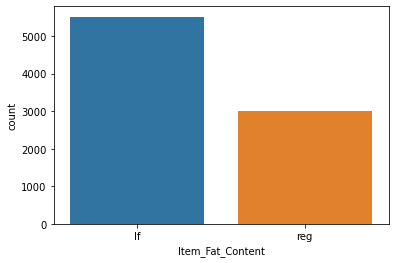

In [11]:
sns.countplot('Item_Fat_Content',data=df)

Now we have two categories only lf(low fat) and reg(regular)

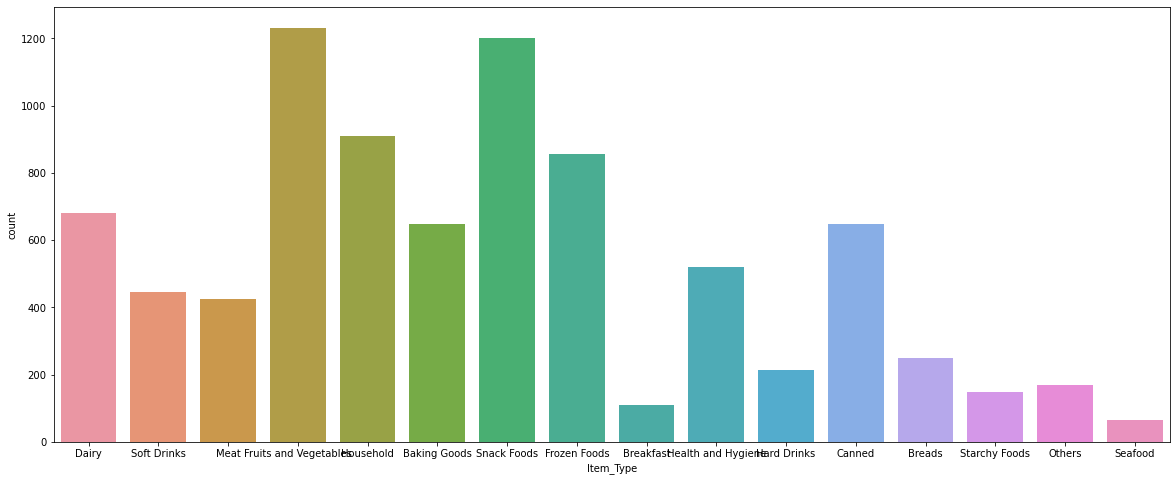

In [12]:
plt.figure(figsize=(20,8))
sns.countplot('Item_Type',data=df)

More than 14% are fruits & vegetables and snacks foods.

In [13]:
df.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

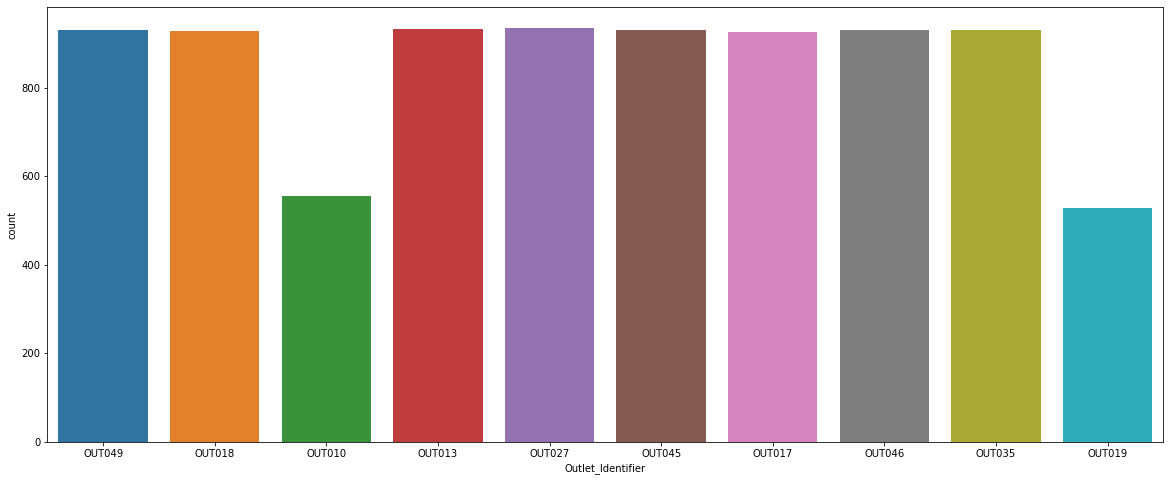

In [14]:
plt.figure(figsize=(20,8))
sns.countplot(df.Outlet_Identifier)

There are total 10 stores.
All the stores are selling almost same number of items except  OUT010 and OUT019 stores.

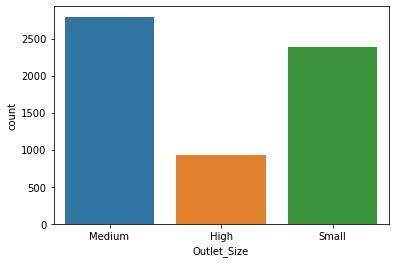

In [15]:
sns.countplot(df.Outlet_Size)

Most of the items are sold from medium size store. Less items are sold from store which are very big.

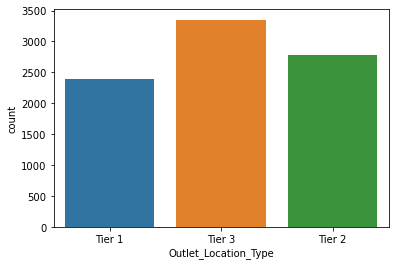

In [16]:
sns.countplot(df.Outlet_Location_Type)

Most of the items sells from the stores laocated in Tier 3 cities.

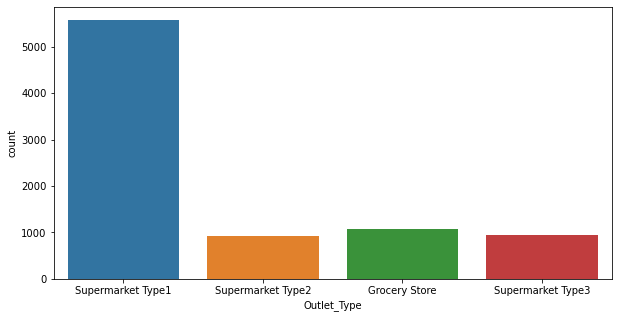

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(df.Outlet_Type)

Most of the items are sold from Supermarket Type 1 whih is almost twice the other types of stores. i.e most of the customers prefer to buy the items from the Supermarket Type 1 stores

In [18]:
#Checking null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are 1463 null values in Item_weight and 2410 null values in Outlet_Size.

In [19]:
#Treating null values
df["Item_Weight"] = df["Item_Weight"].fillna(df["Item_Weight"].mean())

In [20]:
df["Outlet_Size"] = df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0]) 

In [21]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [22]:
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

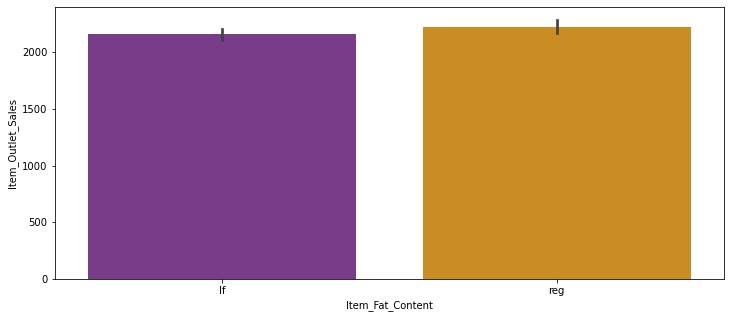

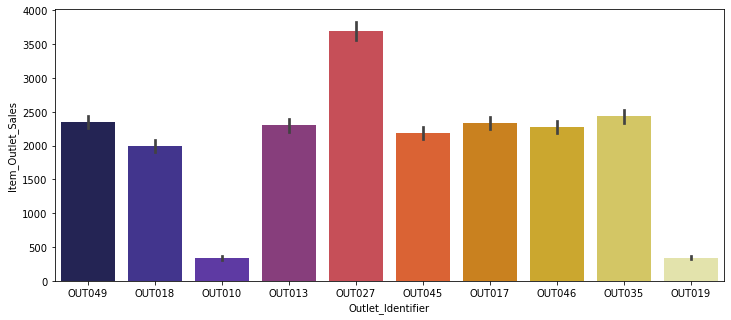

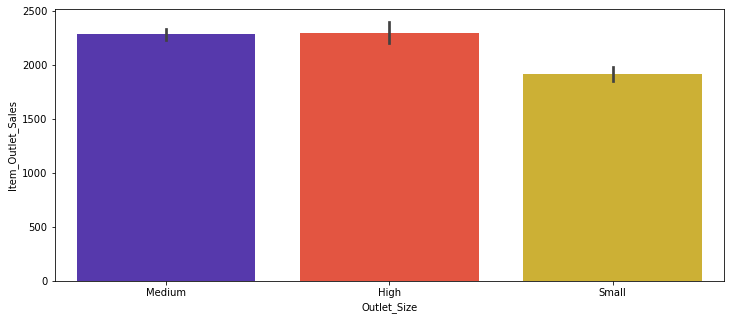

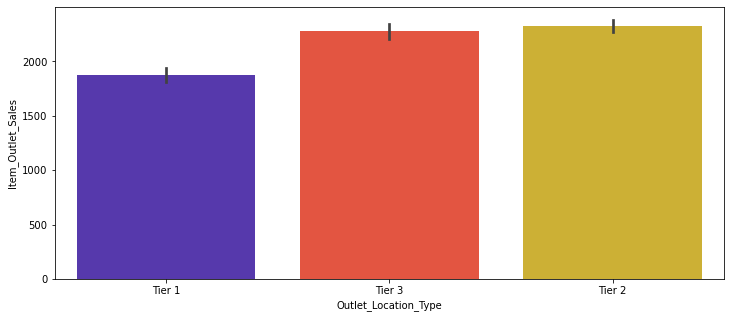

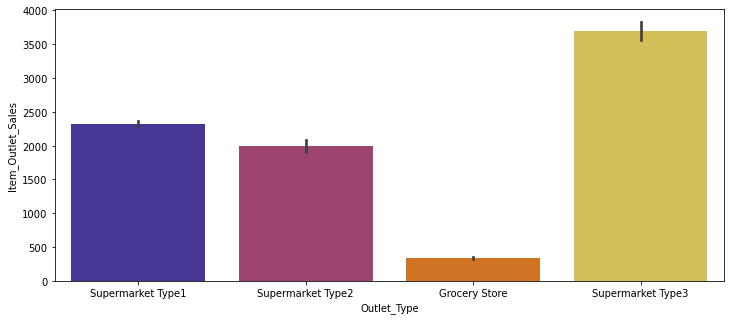

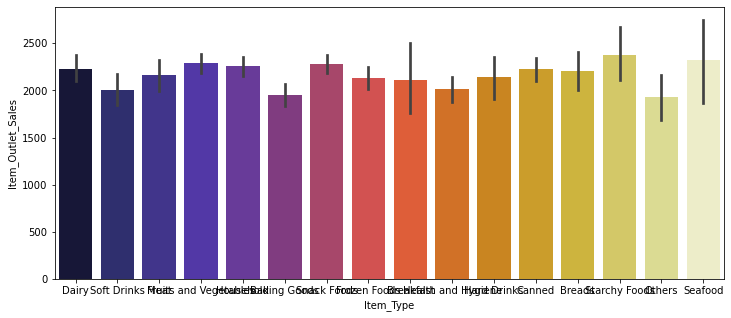

In [23]:
#Doing Bi-variate analysis
columns = df[["Item_Fat_Content","Outlet_Identifier","Outlet_Size","Outlet_Location_Type","Outlet_Type","Item_Type"]]
for i in columns:
    plt.figure(figsize=(12,5))
    ax = sns.barplot(columns[i],df["Item_Outlet_Sales"],palette = "CMRmap") 

Observations:
    
Product with regular fat have more sale than low fat products.

The medium size Outlets are more than the others but about sales, In the High Outlets sales numbers are better.

Tier 3 Outlets has the majority in the cities, but best sales is higher in Tier 2 Outlets.

As a outlet type Type 1 Supermarkets widely positioned than the others but about sales Tier 3 Supermarkets have the best sales.

The most stocked item types are Fruits, Vegetables and Snacks but best seller is Starchy Foods.

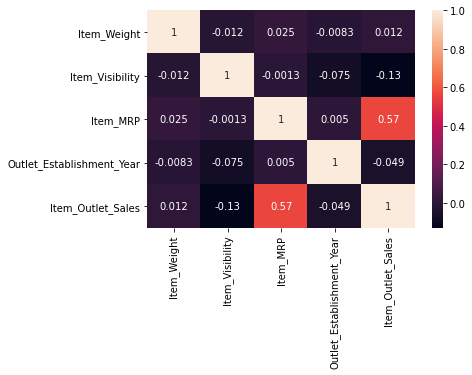

In [24]:
#Checking correlation
sns.heatmap(df.corr(),annot=True)

Item_MRP and Sales is  highly(+ve) correlated.

Item_Weight and Sales correlated too.

In [25]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type']
for i in col:
    df[i] = le.fit_transform(df[i])

In [26]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.20,1,0.000000,6,182.0950,OUT010,1998,1,2,0,732.3800
4,NCD19,8.93,0,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052


In [27]:
#dropping unnecessary columns
df.drop(["Item_Identifier","Outlet_Identifier","Outlet_Establishment_Year"],axis=1, inplace =True)

In [28]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,0,2,1,994.7052


# Checking Outliers

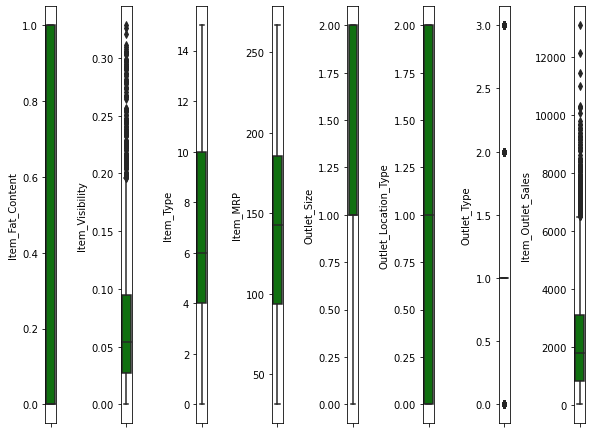

In [29]:
collist=df.columns.values
ncol=12
nrows=10
plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
        plt.subplot(nrows,ncol,i+1)
        sns.boxplot(df[collist[i]],color='green',orient='v')
        plt.tight_layout()

No major outliers are present in our dataset.

In [30]:
#checking skewness
df.skew()

Item_Weight             0.090561
Item_Fat_Content        0.616705
Item_Visibility         1.167091
Item_Type               0.101655
Item_MRP                0.127202
Outlet_Size            -0.087072
Outlet_Location_Type   -0.209093
Outlet_Type             0.927438
Item_Outlet_Sales       1.177531
dtype: float64

In [31]:
#Spliting x and y data
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [32]:
x.shape,y.shape

((8523, 8), (8523,))

In [33]:
#Scaling data using standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
a=sc.fit_transform(x)
a=pd.DataFrame(a,columns=x.columns)

In [34]:
x=a
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.841872,-0.738147,-0.970732,-0.766479,1.747454,-0.284581,-1.369334,-0.252658
1,-1.641706,1.354743,-0.908111,1.608963,-1.489023,-0.284581,1.091569,1.002972
2,1.098554,-0.738147,-0.956917,0.658786,0.010040,-0.284581,-1.369334,-0.252658
3,1.500838,1.354743,-1.281758,-0.291391,0.660050,-0.284581,1.091569,-1.508289
4,-0.929428,-0.738147,-1.281758,0.421242,-1.399220,-1.950437,1.091569,-0.252658


In [35]:
x.shape


(8523, 8)

Finding the best random state:

In [36]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
lr=LinearRegression()
ls=Lasso()
rd=Ridge()

In [37]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print('At random state',i,'Training accuracy is:', r2_score(y_train,pred_train))
    print('At random state',i,'Testing accuracy is:',r2_score(y_test,pred_test))
    print('\n')

At random state 0 Training accuracy is: 0.5071071991237219
At random state 0 Testing accuracy is: 0.5111447589317332


At random state 1 Training accuracy is: 0.5077456614900406
At random state 1 Testing accuracy is: 0.5080683303189504


At random state 2 Training accuracy is: 0.5116696403732248
At random state 2 Testing accuracy is: 0.49275605364160613


At random state 3 Training accuracy is: 0.4988998238933803
At random state 3 Testing accuracy is: 0.5426652182837965


At random state 4 Training accuracy is: 0.5099802676189777
At random state 4 Testing accuracy is: 0.4976581775232565


At random state 5 Training accuracy is: 0.5105695509417316
At random state 5 Testing accuracy is: 0.4970628468349826


At random state 6 Training accuracy is: 0.5077533994845811
At random state 6 Testing accuracy is: 0.5076340988233272


At random state 7 Training accuracy is: 0.5118012646338728
At random state 7 Testing accuracy is: 0.4933459202706416


At random state 8 Training accuracy is: 0.50501

At random state 45 we are getting the best result. Therefore we will split our train and test data at random state 45.

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=45)

In [39]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6818, 8), (1705, 8), (6818,), (1705,))

In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score

In [41]:
svr=SVR()
knn=KNeighborsRegressor()
rf=RandomForestRegressor()
ada=AdaBoostRegressor()

In [42]:
model=[lr,ls,rd,svr,knn,rf,ada]

for i in model:
    print('\n')
    print(i)
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    score=i.score(x_train,y_train)
    print('score:',score)
    print('mean absolute error:',mean_absolute_error(y_test,pred))
    print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,pred)))
    print('r2_score:',r2_score(y_test,pred))
    scores=cross_val_score(i, x, y, cv=5)
    print('Cross Validation Score:',scores.mean())



LinearRegression()
score: 0.5072681422448497
mean absolute error: 917.8212512360593
Root mean squared error: 1215.8532693176326
r2_score: 0.5098882896851593
Cross Validation Score: 0.5060476730056802


Lasso()
score: 0.5072635412863773
mean absolute error: 917.6633391299458
Root mean squared error: 1215.8529833627272
r2_score: 0.5098885202225684
Cross Validation Score: 0.5060644330571274


Ridge()
score: 0.5072681220204428
mean absolute error: 917.8079673034717
Root mean squared error: 1215.8540416155454
r2_score: 0.5098876670567869
Cross Validation Score: 0.506048602631517


SVR()
score: 0.05969357140781506
mean absolute error: 1263.6371916946875
Root mean squared error: 1696.8656422561223
r2_score: 0.0453863104783071
Cross Validation Score: 0.06215709275935988


KNeighborsRegressor()
score: 0.6719927572935793
mean absolute error: 848.1215005043988
Root mean squared error: 1201.5808512472825
r2_score: 0.5213272078168966
Cross Validation Score: 0.5092913126658559


RandomForestRegres

RandomForestRegressor is performing good among all with r2 score of 53.7% and cross validation score of 54.3%.

In [43]:
#Saving our model
import joblib
joblib.dump(rf,'Mart_Sales_rf.obj')

['Mart_Sales_rf.obj']

In [66]:
#importing Test data
df_test=pd.read_csv('bigdatamart_test.csv')

In [67]:
df_test.shape

(5681, 11)

The test data contains 5681 rows and 11 coolumns.

In [68]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [69]:
#columns name
df_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [70]:
df_test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

Test data types are similar to train data types.

In [61]:
df_test.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type
count,4705.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,1.368773,0.065684,141.023273,1997.828903,1.112832
std,4.664849,0.641085,0.051252,61.809091,8.372256,0.812824
min,4.555000,0.000000,0.000000,31.990000,1985.000000,0.000000
25%,8.645000,1.000000,0.027047,94.412000,1987.000000,0.000000
50%,12.500000,1.000000,0.054154,141.415400,1999.000000,1.000000
75%,16.700000,2.000000,0.093463,186.026600,2004.000000,2.000000
max,21.350000,4.000000,0.323637,266.588400,2009.000000,2.000000


In [72]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

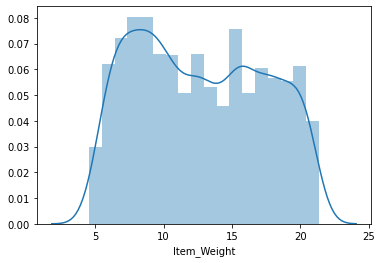

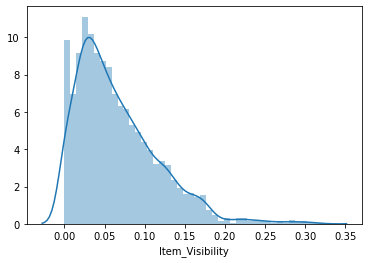

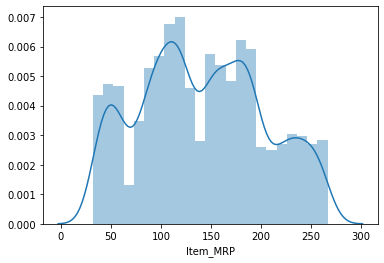

In [73]:
#checking distribution of data
for i in df_test.columns:
    if (df_test[i].dtypes == float) or (df_test[i].dtypes==int):
        sns.distplot(df_test[i])
        plt.show()

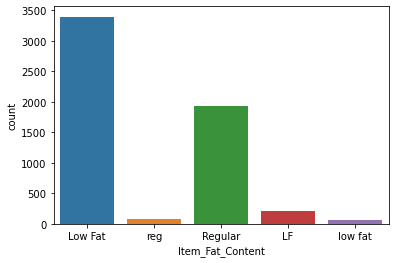

In [74]:
sns.countplot(df_test['Item_Fat_Content'])

In [75]:
#Merging the item fat contents as we did in train data
df_test['Item_Fat_Content']=df_test['Item_Fat_Content'].apply(lambda x: x.lower())
df_test['Item_Fat_Content']=df_test['Item_Fat_Content'].apply(lambda x:'lf' if x=='low fat' else x )
df_test['Item_Fat_Content']=df_test['Item_Fat_Content'].apply(lambda x:'reg' if x=='regular' else x )

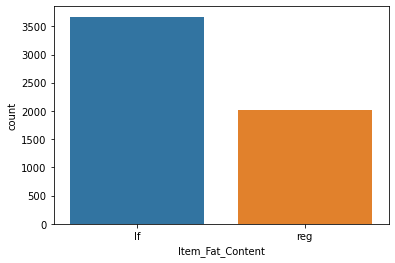

In [76]:
sns.countplot(df_test['Item_Fat_Content'])

In [77]:
#Treating null values
df_test["Item_Weight"] = df_test["Item_Weight"].fillna(df_test["Item_Weight"].mean())
df_test["Outlet_Size"] = df_test["Outlet_Size"].fillna(df_test["Outlet_Size"].mode()[0]) 

In [78]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [81]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col = df_test.columns
for i in col:
    if df_test[i].dtypes==object:
        df_test[i] = le.fit_transform(df_test[i])

In [82]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,1,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,2007,1,1,1
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3


In [83]:
#dropping unnecessary columns
df_test.drop(["Item_Identifier","Outlet_Identifier","Outlet_Establishment_Year"],axis=1, inplace =True)

In [84]:
df_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0,0.007565,13,107.8622,1,0,1
1,8.300000,1,0.038428,4,87.3198,1,1,1
2,14.600000,0,0.099575,11,241.7538,1,2,0
3,7.315000,0,0.015388,13,155.0340,1,1,1
4,12.695633,1,0.118599,4,234.2300,1,2,3


In [85]:
#Scaling data using standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
a=sc.fit_transform(df_test)
a=pd.DataFrame(a,columns=df_test.columns)

In [86]:
df_test=a

In [87]:
df_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1.897460e+00,-0.740811,-1.134077,1.366916,-0.536555,-0.284737,-1.369215,-0.252769
1,-1.035530e+00,1.349873,-0.531850,-0.766450,-0.868937,-0.284737,-0.138827,-0.252769
2,4.486336e-01,-0.740811,0.661316,0.892835,1.629848,-0.284737,1.091560,-1.507994
3,-1.267578e+00,-0.740811,-0.981416,1.366916,0.226697,-0.284737,-0.138827,-0.252769
4,-5.230960e-14,1.349873,1.032540,-0.766450,1.508110,-0.284737,1.091560,2.257683


In [88]:
#importing the model
sales_model=joblib.load('Mart_Sales_rf.obj')

In [89]:
sales_model.predict(df_test)

array([1906.971044, 1413.819642,  846.178536, ..., 1827.194888,
       4907.891436, 1638.620354])